## Electricity Price Prediction (Spain)
*Source: https://www.kaggle.com/code/nigelclinton/energy-price-prediction-ml*

*Description: Machine Learning model to predict actual electricity price based on various factors (Day-ahead price, generation, seasonality)*

*Steps:*


<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Importing Libraries & Data](#1) <br>
2. [Data Exploration](#2) <br>
3. [Data Cleaning](#3) <br>
4. [Machine Learning Models](#4)<br>
    - [Multiple Lineal Regression](#5)<br>
    - [Random Forest Regression ](#6)<br>
5. [Results](#7) <br>

</div>

### 1. Importing Libraries & Data <a id="1"></a>


In [8]:
# Data Wrangling
import numpy as np
import pandas as pd

# Visualization
!pip install plotly
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Model Creation
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
# from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV
from sklearn.metrics import roc_curve, plot_roc_curve, mean_absolute_error, mean_squared_error, accuracy_score

# Import Data 
Energy = '/Users/brunoluis/Jupyter/Projects /Electricity Price Prediction (Kaggle)/energy_dataset.csv'
Data = pd.read_csv(Energy)
Data.rename(columns={'Unnamed: 0':'time'}, inplace = True)

Data

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


### 2. Data exploration: <a id="2"></a>
* Check for missing values
* Check for correlations between columns 


In [9]:
# Describe Data
Data.head(5)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


We can see that there are columns with null values. These will need to be removed, but first lets check the correlations between the columns

In [10]:
# Pearson correlation to check data correlations

correlations = Data.corr(method = 'pearson')
correlations['price actual'].sort_values(ascending=False)

price actual                                   1.000000
price day ahead                                0.732155
generation fossil hard coal                    0.465641
generation fossil gas                          0.461706
total load actual                              0.436127
total load forecast                            0.435864
generation fossil brown coal/lignite           0.364088
generation fossil oil                          0.284679
generation other renewable                     0.256181
generation waste                               0.169605
generation biomass                             0.142369
forecast solar day ahead                       0.101402
generation other                               0.100048
generation solar                               0.098488
generation hydro water reservoir               0.071549
generation nuclear                            -0.052596
generation hydro run-of-river and poundage    -0.137106
generation wind onshore                       -0

Several columns show Nan, meaning that they have only null values. We will remove them

In [11]:
# Drop columns
Drop = ['generation marine',
                 'generation geothermal',
                 'generation fossil peat',
                 'generation wind offshore',
                 'generation fossil oil shale',
                 'forecast wind offshore eday ahead',
                 'generation fossil coal-derived gas',
                 'generation hydro pumped storage aggregated']
Data_2 = Data.drop(columns = Drop, axis = 1)

# Checking if columns were dropped 
Data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation hydro pumped storage consumption  35045 non-null  float64
 7   generation hydro run-of-river and poundage   35045 non-null  float64
 8   generation hydro water reservoir             35046 non-null  float64
 9   generation nuclear                           35047 non-null  float64
 10

In [12]:
# Correlations for new data set 
corr_2 = Data_2.corr(method = 'pearson')

In [13]:
#Percentage of null values in the columns 
round((Data_2.isnull().sum()/len(Data_2)*100),2)

time                                           0.00
generation biomass                             0.05
generation fossil brown coal/lignite           0.05
generation fossil gas                          0.05
generation fossil hard coal                    0.05
generation fossil oil                          0.05
generation hydro pumped storage consumption    0.05
generation hydro run-of-river and poundage     0.05
generation hydro water reservoir               0.05
generation nuclear                             0.05
generation other                               0.05
generation other renewable                     0.05
generation solar                               0.05
generation waste                               0.05
generation wind onshore                        0.05
forecast solar day ahead                       0.00
forecast wind onshore day ahead                0.00
total load forecast                            0.00
total load actual                              0.10
price day ah

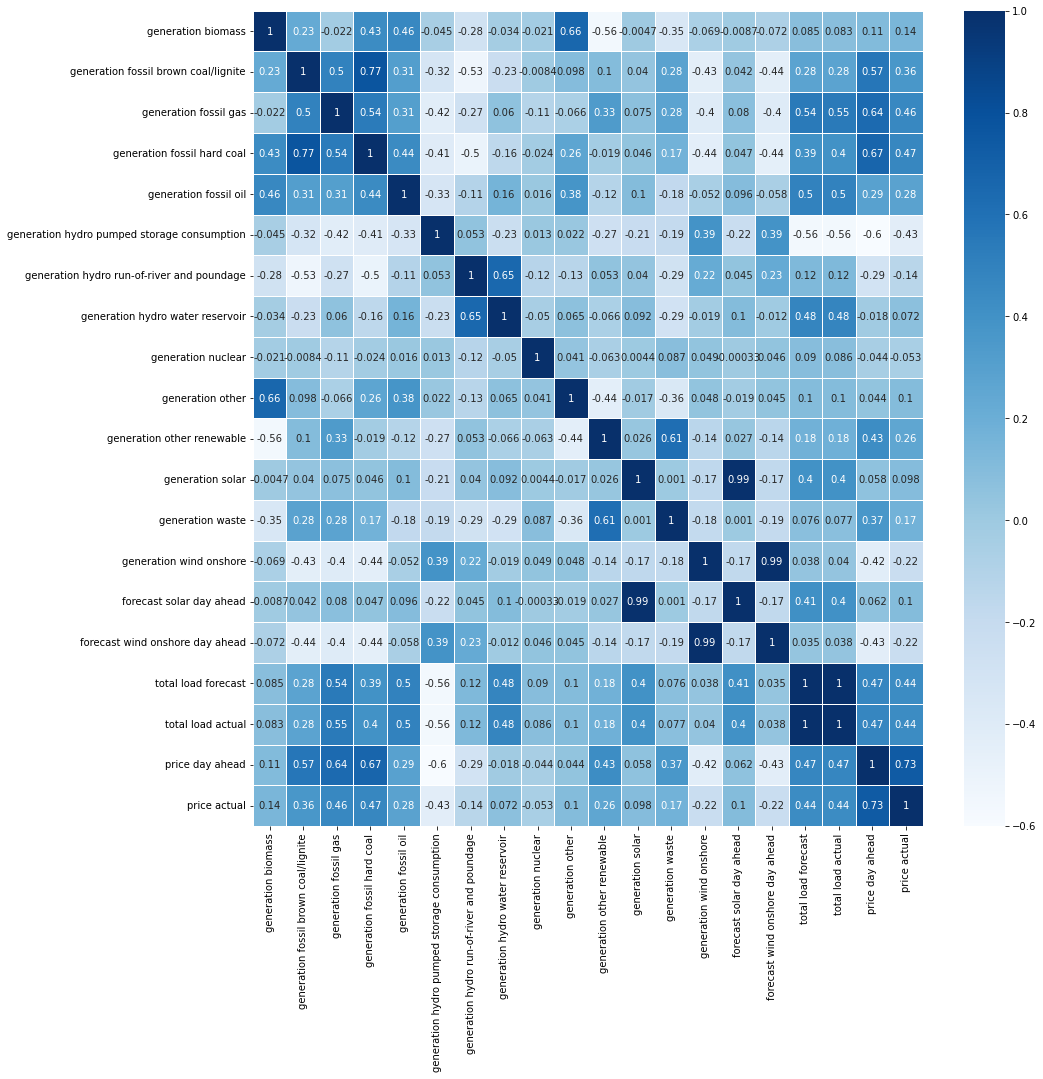

In [14]:
# Heatmap to visualize correlations 
plt.figure(figsize = (15,15))
sns.heatmap(corr_2,annot=True,cmap='Blues',linewidth=0.9)
plt.show();

<AxesSubplot:xlabel='price actual', ylabel='Count'>

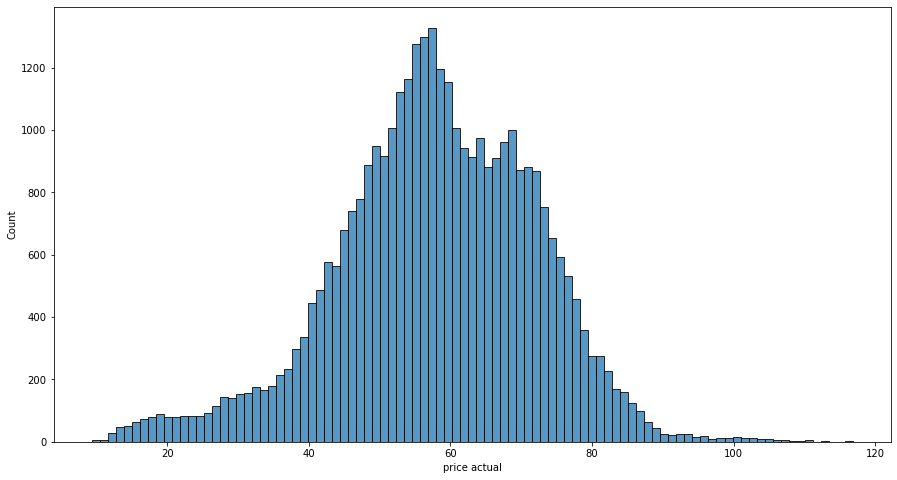

In [15]:
plt.figure(figsize=(15,8))
sns.histplot(Data_2,x='price actual')

#### Data Exploration Results: 
* Normal Distribution for target variable (Price actual)
* Low percentage of missing values in columns 

### 3) Data Cleaning <a id="3"></a>

In [16]:
# Drop missing values
Data_2 = Data_2.dropna( axis = 0)
Data_2.reset_index(drop=True, inplace=True)

#Percentage of null values in the columns 
round((Data_2.isnull().sum()/len(Data_2)*100),2)

time                                           0.0
generation biomass                             0.0
generation fossil brown coal/lignite           0.0
generation fossil gas                          0.0
generation fossil hard coal                    0.0
generation fossil oil                          0.0
generation hydro pumped storage consumption    0.0
generation hydro run-of-river and poundage     0.0
generation hydro water reservoir               0.0
generation nuclear                             0.0
generation other                               0.0
generation other renewable                     0.0
generation solar                               0.0
generation waste                               0.0
generation wind onshore                        0.0
forecast solar day ahead                       0.0
forecast wind onshore day ahead                0.0
total load forecast                            0.0
total load actual                              0.0
price day ahead                

In [17]:
# Seasonality function on the data

def season(filepath):
    
    # Read in the data, parse dates, and set the index
    Data_3 = pd.read_csv(filepath,parse_dates=['time'],index_col='time')
 
    # Rename columns by replacing all - or blank space with _
    Data_3.columns = Data_3.columns.str.replace(' ','_').str.replace('-','_')
    
    Data_3.drop(columns=['price_day_ahead',
                     'generation_marine',
                     'total_load_forecast',
                     'generation_geothermal',
                     'generation_fossil_peat',
                     'generation_wind_offshore',
                     'forecast_solar_day_ahead',
                     'generation_fossil_oil_shale',
                     'forecast_wind_onshore_day_ahead',
                     'forecast_wind_offshore_eday_ahead',
                     'generation_fossil_coal_derived_gas',
                     'generation_hydro_pumped_storage_aggregated'],inplace=True)

    # Make the index DT
    Data_3.index = pd.to_datetime(Data_3.index, utc=True)    
    
    # Drop Outlier row 2014 for plotting
    Data_3 = Data_3.drop(pd.Timestamp('2014-12-31 23:00:00+00:00')) 
    
    # Sort index
    Data_3 = Data_3.sort_index()
    
    # Set conditional satements for filtering times of month to season value
    condition_winter = (Data_3.index.month>=1)&(Data_3.index.month<=3)
    condtion_spring = (Data_3.index.month>=4)&(Data_3.index.month<=6)
    condition_summer = (Data_3.index.month>=7)&(Data_3.index.month<=9)
    condition_automn = (Data_3.index.month>=10)@(Data_3.index.month<=12)
    
    # Create column in dataframe that inputs the season based on the conditions created above
    Data_3['season'] = np.where(condition_winter,'winter',
                            np.where(condtion_spring,'spring',
                                     np.where(condition_summer,'summer',
                                              np.where(condition_automn,'autumn',np.nan))))

    return Data_3

# Applying the wrangle function to the dataset
Data_3=season(Energy)

In [18]:
Data_3

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,total_load_actual,price_actual,season
time,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,winter
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,winter
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,winter
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,winter
2015-01-01 04:00:00+00:00,410.0,178.0,4038.0,3590.0,156.0,2109.0,952.0,743.0,7098.0,43.0,74.0,34.0,188.0,4618.0,19905.0,53.63,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0,77.02,autumn
2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0,76.16,autumn
2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0,74.30,autumn


<AxesSubplot:xlabel='total_load_actual', ylabel='price_actual'>

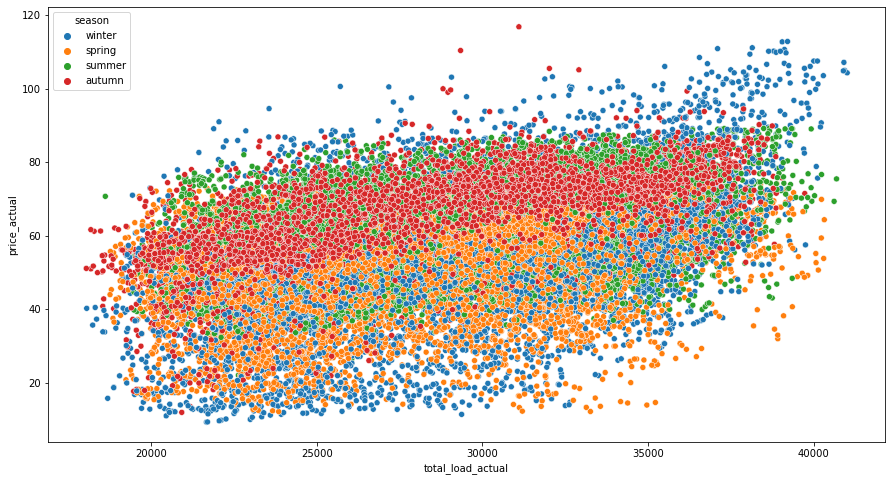

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'total_load_actual', y = 'price_actual', hue = 'season', data = Data_3)

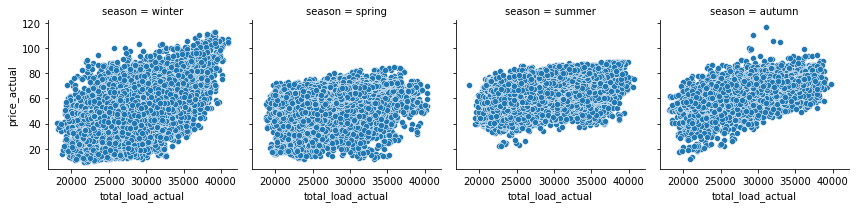

In [20]:
seasons = sns.FacetGrid(Data_3, col = 'season')
seasons.map(sns.scatterplot, 'total_load_actual', 'price_actual')

### 4) Machine Learning model: <a id="4"></a>

#### Multiple Linear Regression <a id="5"></a>

In [21]:
# Creating the Linear Regression model
lm = LinearRegression()

# Eliminating NaN values

Data_3 = Data_3.dropna( axis = 0)
Data_3.reset_index(drop=True, inplace=True)

#Percentage of null values in the columns 
round((Data_3.isnull().sum()/len(Data_3)*100),2)

generation_biomass                             0.0
generation_fossil_brown_coal/lignite           0.0
generation_fossil_gas                          0.0
generation_fossil_hard_coal                    0.0
generation_fossil_oil                          0.0
generation_hydro_pumped_storage_consumption    0.0
generation_hydro_run_of_river_and_poundage     0.0
generation_hydro_water_reservoir               0.0
generation_nuclear                             0.0
generation_other                               0.0
generation_other_renewable                     0.0
generation_solar                               0.0
generation_waste                               0.0
generation_wind_onshore                        0.0
total_load_actual                              0.0
price_actual                                   0.0
season                                         0.0
dtype: float64

<AxesSubplot:xlabel='total_load_actual', ylabel='price_actual'>

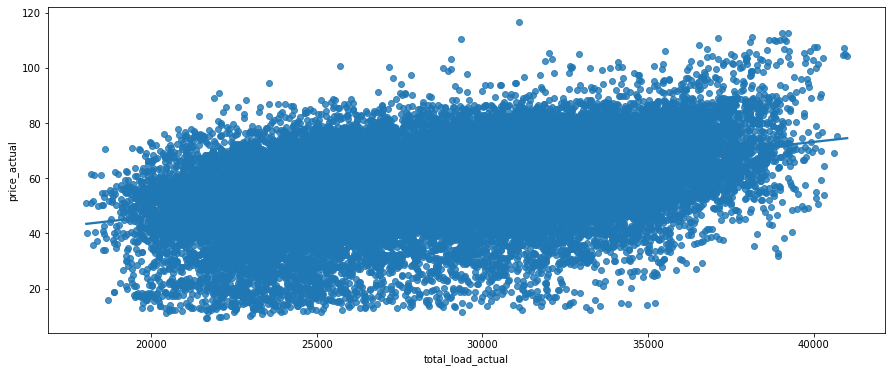

In [22]:
# Define dependent and independent variables

Y = Data_3[['price_actual']]
X = Data_3.drop(columns = ['price_actual','season'], axis = 1)

# Fit model

lm.fit(X,Y)

# Model evaluation with data visualization (Regression plot work only for linear regression, not MLR)
plt.figure(figsize=(15,6))
sns.regplot(x = 'total_load_actual', y = 'price_actual', data = Data_3)

/Users/brunoluis/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/brunoluis/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


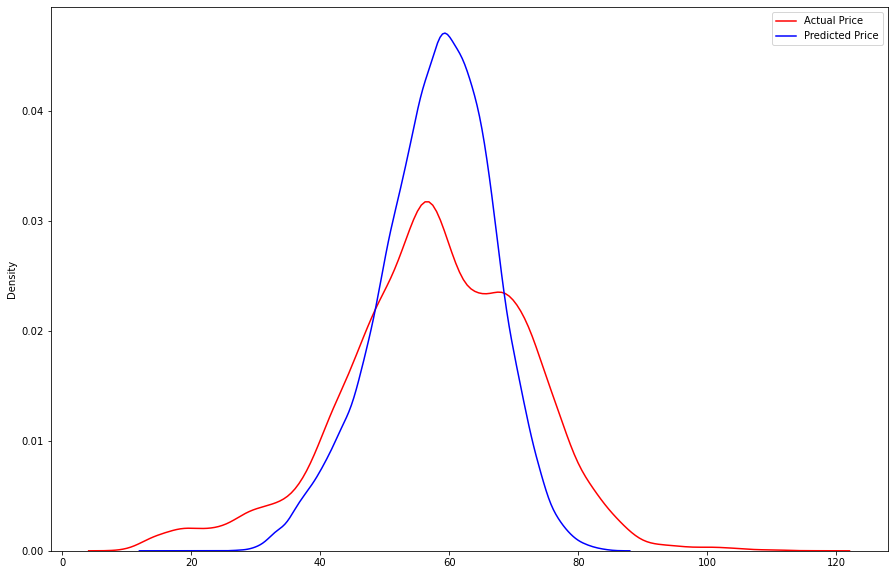

In [23]:
# We need to plot a graph appropriate to show the accuracy of the MLR, but first we need to plot the prediction of the model
Y_hat = lm.predict(X)

# Comparing predicted and real values 
plt.figure(figsize=(15,10))
sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values")
plt.legend(labels=["Actual Price","Predicted Price"])

In [24]:
mean_squared_error(Y,Y_hat)

125.52082234917424

In [25]:
mean_absolute_error(Y,Y_hat)

8.492183945270618

In [26]:
#Root mean squared error
RMSE = np.sqrt(mean_squared_error(Y,Y_hat))
RMSE

11.20360755958429

MLR does not seem a very adeqcuate model. We should try Random Forest Regression

#### Random Forest Regression <a id="6"></a>

In [27]:
# Defining dependent and independent variables 
Y = Data_3[['price_actual']].values
X = Data_3.drop(columns = ['price_actual','season'], axis = 1).values

In [28]:
# Checking X dimensions
X.shape

(35017, 15)

In [29]:
# Checking Y dimensions
Y.shape

(35017, 1)

In [38]:
# Train-Test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

# Fitting Random Forest Regression to Dataset

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
regressor = RandomForestRegressor(n_estimators = 12, random_state = 0)
regressor.fit(X_train, Y_train)

# Obtaining prediction 

Y_predicted = regressor.predict(X_test)


/var/folders/s4/hjqnxldj319940nj9j_xc6b80000gn/T/ipykernel_698/694350993.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, Y_train)


/Users/brunoluis/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/brunoluis/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


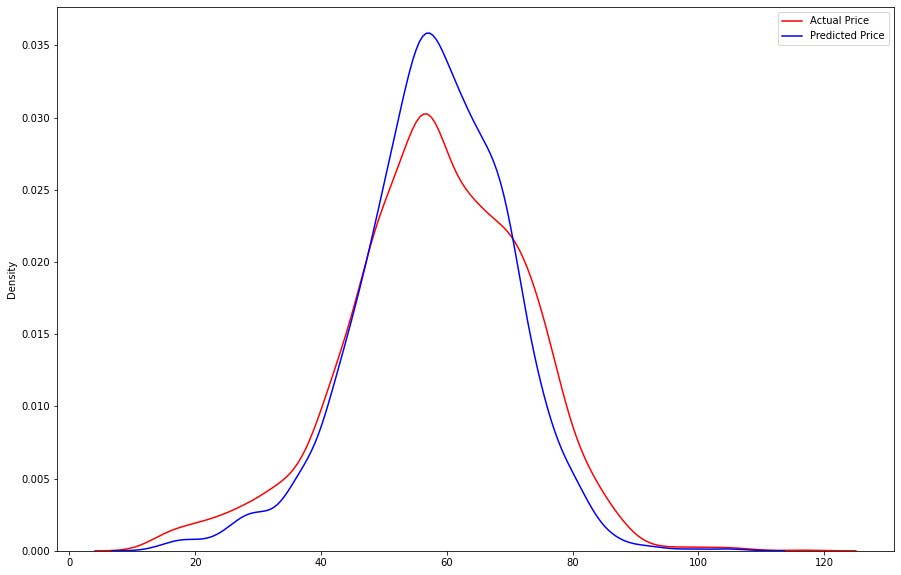

In [39]:
# Comparing predicted and actual values

plt.figure(figsize=(15,10))
sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_predicted, hist=False, color="b", label="Fitted Values")
plt.legend(labels=["Actual Price","Predicted Price"])

In [40]:
mean_squared_error(Y_test,Y_predicted)

35.06357031220255

In [33]:
mean_absolute_error(Y_test,Y_predicted)

4.075783552255853

In [34]:
np.sqrt(mean_squared_error(Y_test,Y_predicted))

6.006660298561811

### 5) Results <a id="7"></a>

Random Forest Regression seems to perform better than linear regression, with a MAE of 4.075 compared to 8.49